# Teoría de Algoritmos - D&C

## Tardos 5

### Exercise 1

You are interested in analyzing some hard to obtain data from two separate databases. Each database contains n numerical values—so there are 2n values total—and you may assume that no two values are the same. You’d like to determine the median of this set of 2n values, which we will define here to be the nth smallest value.
However, the only way you can access these values is through queries to the databases. In a single query, you can specify a value k to one of the two databases, and the chosen database will return the kth smallest value that it contains. Since queries are expensive, you would like to compute the median using as few queries as possible.
Give an algorithm that finds the median value using at most O(log n) queries.

#### Solution

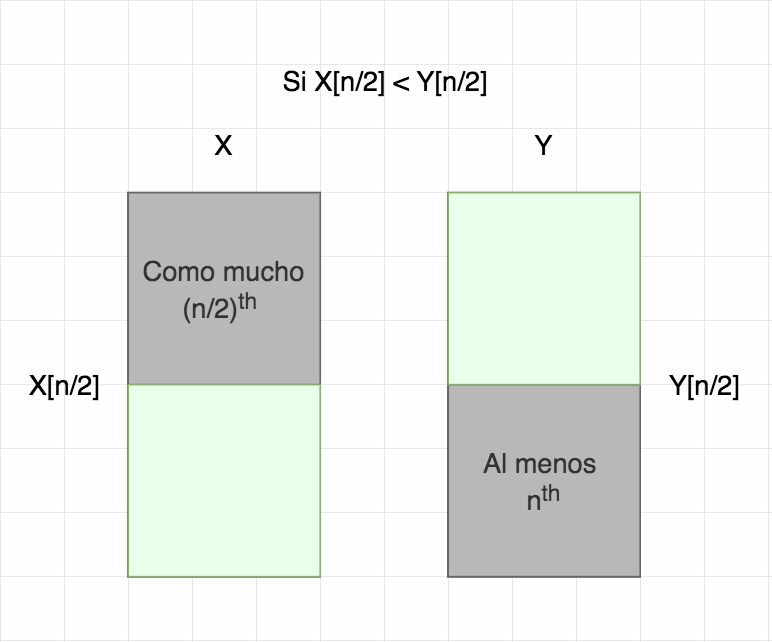

In [72]:
# TODO: Revisar casos

def median(X,Y):
    n = len(X)
    k = int(round(n/2))
    if n == 1: return min(X[0],Y[0])
    return median(X[n//2:],Y[:n//2]) if X[k] < Y[k] else median(X[:n//2], Y[n//2:])

# median(0,1,3,4,6,7,8,9)
X = [0,1,6,8]
Y = [3,4,7,9]
print(median(X,Y))

4


### Exercise 2

Recall the problem of finding the number of inversions. As in the text, we are given a sequence of n numbers a1, . . . , an, which we assume are all distinct, and we define an inversion to be a pair i < j such that ai > aj.
We motivated the problem of counting inversions as a good measure of how different two orderings are. However, one might feel that this measure is too sensitive. Let’s call a pair a significant inversion if i < j and ai > 2aj. Give an O(n log n) algorithm to count the number of significant inversions between two orderings.

In [117]:
def merge(S1, S2):
    print(S1,S2)
    n1, n2 = len(S1), len(S2)
    i1, i2 = 0, 0
    r = []
    while i1<n1 or i2<n2:
        s = min(S1[i1],S2[i2]) if i1 < n1 and i2 < n2 else S1[i1] if i1 < n1 else S2[i2]
        r.append(s)
        i1 += 1 if i1 < n1 and s == S1[i1] else 0
        i2 += 1 if i2 < n2 and s == S2[i2] else 0
    return r

def count(S1, S2):
    n1, n2 = len(S1), len(S2)
    i1, i2 = n1-1, n2-1
    inversions = 0
    while i1>=0 and i2>=0:
        if S1[i1] <= 2*S2[i2]: 
            i2 -= 1
        elif S1[i1] > 2*S2[i2]:
            inversions += i2 + 1
            i1 -= 1
    return inversions

def significant_inversions(S):
    if len(S) <= 1:
        return 0, S
    k = len(S)/2
    inv1, S1 = significant_inversions(S[:k])
    inv2, S2 = significant_inversions(S[k:])
    total = inv1 + inv2 + count(S1, S2)
    return total, merge(S1,S2)



### Exercise 3

Suppose you’re consulting for a bank that’s concerned about fraud detection, and they come to you with the following problem. They have a collection of n bank cards that they’ve confiscated, suspecting them of being used in fraud. Each bank card is a small plastic object, contain- ing a magnetic stripe with some encrypted data, and it corresponds to a unique account in the bank. Each account can have many bank cards corresponding to it, and we’ll say that two bank cards are equivalent if they correspond to the same account.
It’s very difficult to read the account number off a bank card directly, but the bank has a high-tech “equivalence tester” that takes two bank cards and, after performing some computations, determines whether they are equivalent.
Their question is the following: among the collection of n cards, is there a set of more than n/2 of them that are all equivalent to one another? Assume that the only feasible operations you can do with the cards are to pick two of them and plug them in to the equivalence tester. Show how to decide the answer to their question with only O(n log n) invocations of the equivalence tester.

#### Solution

T(n) = 2\*T(n/2) + O(n)

In [37]:
def majority(S):
    n = len(S)
    if n <= 2: return S[0] if S[0] == S[-1] else None
    S1, S2 = S[:n//2], S[n//2:]
    c1, c2 = majority(S1), majority(S2)
    return c1 if S.count(c1) > n//2 else \
            c2 if S.count(c2) > n//2 else None

### Exercise 4

You’ve been working with some physicists who need to study, as part of their experimental design, the interactions among large numbers of very small charged particles. Basically, their setup works as follows. They have an inert lattice structure, and they use this for placing charged particles at regular spacing along a straight line. Thus we can model their structure as consisting of the points {1, 2, 3, . . . , n} on the real line; and at each of these points j, they have a particle with charge qj. (Each charge can be either positive or negative.)
They want to study the total force on each particle, by measuring it and then comparing it to a computational prediction. This computational part is where they need your help. The total net force on particle j, by Coulomb’s Law, is equal to

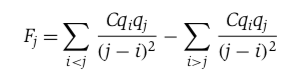

They’ve written the following simple program to compute Fj for all j:

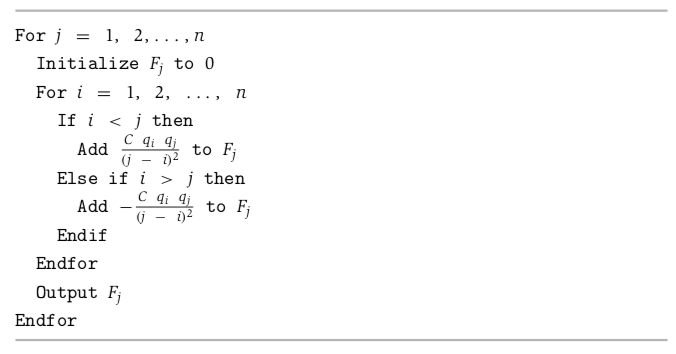

It’s not hard to analyze the running time of this program: each invocation of the inner loop, over i, takes O(n) time, and this inner loop is invoked O(n) times total, so the overall running time is O(n2).
The trouble is, for the large values of n they’re working with, the pro- gram takes several minutes to run. On the other hand, their experimental setup is optimized so that they can throw down n particles, perform the measurements, and be ready to handle n more particles within a few sec- onds. So they’d really like it if there were a way to compute all the forces Fj much more quickly, so as to keep up with the rate of the experiment.
Help them out by designing an algorithm that computes all the forces Fj in O(n log n) time.

#### Solution

TODO: Convolución

### Exercise 5

Hidden surface removal is a problem in computer graphics that scarcely needs an introduction: when Woody is standing in front of Buzz, you should be able to see Woody but not Buzz; when Buzz is standing in front of Woody, . . . well, you get the idea.
The magic of hidden surface removal is that you can often compute things faster than your intuition suggests. Here’s a clean geometric ex- ample to illustrate a basic speed-up that can be achieved. You are given n nonvertical lines in the plane, labeled L1, . . . , Ln, with the ith line specified by the equation y = aix + bi. We will make the assumption that no three of the lines all meet at a single point. We say line Li is uppermost at a given x-coordinate x0 if its y-coordinate at x0 is greater than the y-coordinates ofalltheotherlinesatx0:aix0+bi>ajx0+bj forallj̸=i.WesaylineLi is visible if there is some x-coordinate at which it is uppermost—intuitively, some portion of it can be seen if you look down from “y = ∞.”
Give an algorithm that takes n lines as input and in O(n log n) time returns all of the ones that are visible. Figure 5.10 gives an example.

#### Solution

TODO

### Exercise 6

Consider an n-node complete binary tree T, where n = 2d − 1 for some d. Each node v of T is labeled with a real number xv. You may assume that the real numbers labeling the nodes are all distinct. A node v of T is a local minimum if the label xv is less than the label xw for all nodes w that are joined to v by an edge.
You are given such a complete binary tree T, but the labeling is only specified in the following implicit way: for each node v, you can determine the value xv by probing the node v. Show how to find a local minimum of T using only O(log n) probes to the nodes of T.

#### Solution

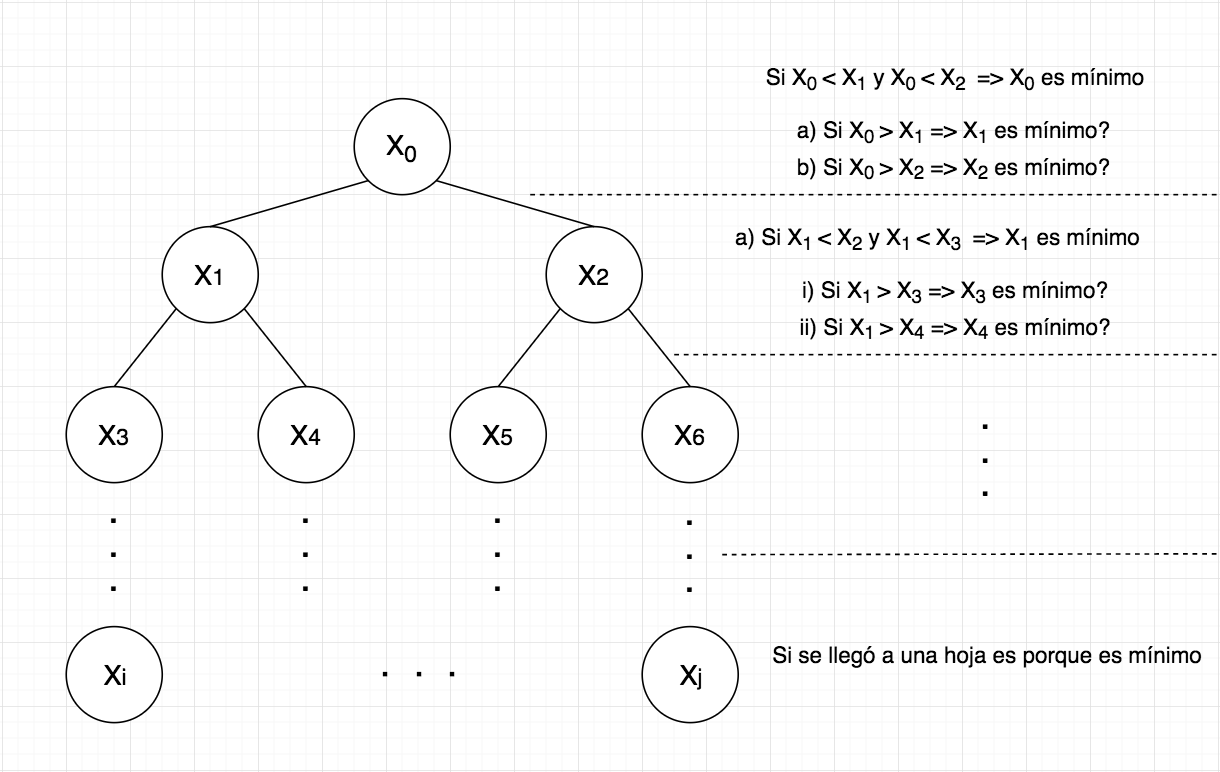